# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [21]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [30]:
# Define the alpha_func function
def alpha_func(D, idx):
 
# Calculate the covariance matrix for Sepal width and Sepal length at the given index/indices
    cov = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    # Compute alpha using the elements of the covariance matrix
    return (cov[1, 1] - cov[0, 1]) / (cov[0, 0] + cov[1, 1] - 2 * cov[0, 1])


Test the code below

In [27]:
alpha_func(df, range(100))

0.6189498510165619

In [31]:
# Calculate alpha values for all rows in the dataframe using the alpha_func
alpha_original = alpha_func(df, range(len(df)))
print(alpha_original)

0.7580390244311441


_(ii)_ Construct a new bootstrap data set and recompute alpha

In [37]:
# Create a random number generator with a seed value of 0
rng = np.random.default_rng(0)

# Generate a bootstrap sample by randomly selecting indices from 0 to 99 with replacement
alpha_bootstrap = alpha_func(df, rng.choice(100, 100, replace=True))

print(f"Bootstrap alpha values: {alpha_bootstrap}")


Bootstrap alpha values: 0.6675354865158225


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Answer: Calculating the mean value of Sepal.Length provides a single summary statistic that describes the central tendency of the data. However, these statistics alone may not provide a complete picture of the distribution of the underlying data or its variability. Performing an initial analysis provides some additional information:
1. Estimation of Variability;
2. Confidence Intervals;
3. Bias Assessment;
4. Robustness to Assumptions;
5. Estimation of Other Statistics


_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [54]:
# Add your code here to set the seed
# Initialize an empty list to store bootstrap values
bootstrap_values = [] 
def boot_SE(D, B=1000, seed=0):
    # Compute the bootstrap standard error of alpha estimates.
    rng = np.random.default_rng(seed)
    n =D.shape[0] 
    # Loop through B bootstrap samples
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = alpha_func(D, idx) 
        # Compute the standard deviation of the bootstrap value
        bootstrap_values.append(value) 
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [56]:

# evaluate the accuray of alpha with B = 1000
alpha_SE = boot_SE(df, B=1000, seed=0)
print(f"Bootstrap Standard Error of Alpha: {alpha_SE}")

Bootstrap Standard Error of Alpha: 0.03180510076860766


_(vi)_ What is the original mean value of `Sepal.Length`?

In [59]:
# Calculate the mean value of Sepal.Length
mean_sepal_length = df['Sepal.Length'].mean()

print(f"The original mean value of Sepal.Length is: {mean_sepal_length}")

The original mean value of Sepal.Length is: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [67]:
# Defines a function bootstrap_sample_mean that calculates bootstrapped sample means.
def bootstrap_sample_mean(data, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed) # Initialize random number generator with seed
    n = n or len(data) # Set number of elements to sample for each bootstrap sample
    bootstrap_means = [] # Initialize empty list to store bootstrap sample means

# Generate B bootstrap samples and compute mean for each
    for _ in range(B):
        sample = rng.choice(data, n, replace=True)
        bootstrap_means.append(np.mean(sample))

    bootstrap_means = np.array(bootstrap_means)
    bootstrapped_mean = np.array(np.mean(bootstrap_means))
    bootstrapped_std = np.std(bootstrap_means)
    t_range = np.ptp(bootstrap_means)

    return bootstrapped_mean, bootstrapped_std, t_range, bootstrap_means

# Assuming df is your DataFrame containing the data
sepal_length = df['Sepal.Length'].values

# Perform bootstrapping to compute mean, std, and range of bootstrapped sample means
boot_mean, boot_std, t_range, boot_samples = bootstrap_sample_mean(sepal_length, B=1000, seed=0)

# Print results
print(f"Bootstrapped mean: {boot_mean}")
print(f"Bootstrapped standard deviation: {boot_std}")
print(f"Range of bootstrapped means: {t_range}")

Bootstrapped mean: 5.842284666666666
Bootstrapped standard deviation: 0.06649295592099295
Range of bootstrapped means: 0.3873333333333342


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [73]:
# Compute the 95% confidence intervals
conf_interval = np.percentile(boot_samples, [2.5, 97.5])

print("95-percent confidence interval for the mean of iris sepal length: ", conf_interval)

95-percent confidence interval for the mean of iris sepal length:  [5.71861667 5.97471667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

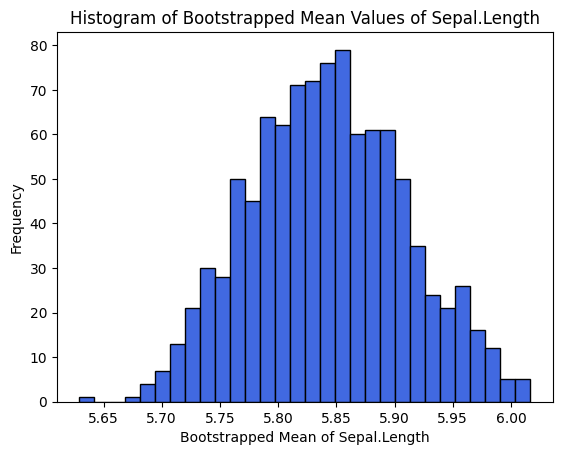

In [90]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_samples, bins=30, color='royalblue', edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Mean Values of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
Based on the initial analysis of mean Sepal.Length from the Iris data set, 
I recommend using the estimated mean Sepal.Length along with its 95% confidence interval to make decisions about pack sizes 
or logistics planning with confidence in the accuracy and variability of the estimates.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
